# Demo: Singapore rail route segmentation and link length calculation

## Purpose
- Download SG's rail network from [RailRouter SG](https://railrouter.sg) and segment the LineString by stations. This gives the user the (nearly) shapes and actual lengths of each rail station link.

## Notation
- route: a rail way line, e.g., Circle Line
- pattern: a service running on a route, e.g., Marina Bay <-> Stadium
- Thus, a route may contain several operating patterns.

## Required Libraries
- segment_rail_routes (in the repo)
- geopandas
- shapely
- osmnx (optional for plotting)

## Notes
- For links with multiple lengths in the data:
> The problem with using mean is that we don't actually have a LineString for that averaged line shape. The route with min does not seem realistic in some part of the network, especially in the BP LRT. As a result, we use max (the longest track) of a given link right now and select the respective LineString as the geometry.

# 1. Setup

In [1]:
# import module
import os
import segment_rail_routes as srr

# all rail route files
# source: https://raw.githubusercontent.com/cheeaun/railrouter-sg/master/data/v2/
rr_files = [
 'lrt-bukit-panjang-lrt.json',
 'lrt-punggol-lrt-east-loop.json',
 'lrt-punggol-lrt-west-loop.json',
 'lrt-sengkang-lrt-east-loop.json',
 'lrt-sengkang-lrt-west-loop.json',
 'mrt-circle-line.json',
 'mrt-downtown-line.json',
 'mrt-east-west-line.json',
 'mrt-north-east-line.json',
 'mrt-north-south-line.json'
]

# 2. Get Output File for All Links
- Overwriting existing geojson with fiona may throw an `CPLE_NotSupportedError`. To bypass, remove existing files manually.

In [2]:
data_path = 'data/'  # path to save output
links = srr.get_all_links(rr_files)  # downloads data
output = srr.get_output(links_df=links, out_path=data_path)  # format output
output.head()

,station_pair,geometry,length
0,Admiralty<>Sembawang,"LINESTRING (103.800933 1.440693999999993, 103....",2374.666094
1,Admiralty<>Woodlands,"LINESTRING (103.787633 1.437501000000002, 103....",1539.790373
2,Aljunied<>Kallang,"LINESTRING (103.882903 1.316362999999994, 103....",1425.156530
3,Aljunied<>PayaLebar,"LINESTRING (103.882903 1.316362999999994, 103....",1064.921948
4,AngMoKio<>Bishan,"LINESTRING (103.849646 1.370112999999995, 103....",2314.043008


# 3. Specific Route Exploration
- You are good if you just want the final output file, but you may continue with the following if you want to take a look at each pattern.

In [3]:
# specify which route file to use
i = 9
rr_file = rr_files[i]
rr_data, patterns = srr.download_rail_route(rr_file, verbose=True)

[Downloaded]
Route: North South Line
Patterns:
0: Jurong East · Marina South Pier
1: Marina South Pier · Kranji
2: Jurong East · Marina Bay
3: Jurong East · Toa Payoh
4: Marina South Pier · City Hall
5: City Hall · Jurong East
6: Yew Tee · Jurong East
7: Ang Mo Kio · Jurong East


In [4]:
# specify which pattern to use
j = 0
pattern = patterns[j]
gdf, path, sttn, lines = srr.get_segmentation(pattern)

In [5]:
# for plotting, consider setting up the following:
# otherwise, use None for both params

# an output path if you want to save the figure (optional)
out_path = 'data/'

# SG road network for basemap plotting (optional)
# [REQUIREMENT] run `!pip install osmnx` if not yet installed
# [INFO] the download will TAKE SOME TIME (like minutes)
# [INFO] if you don't want to plot the basemap but want the route shape
#        to be proportional to reality, covert the crs to 3857
roadnet = srr.load_roadnet()

Trying to download the network of Singapore through OSM Nominatim.
Singapore roadnet is downloaded and loaded as a GeoDataFrame.


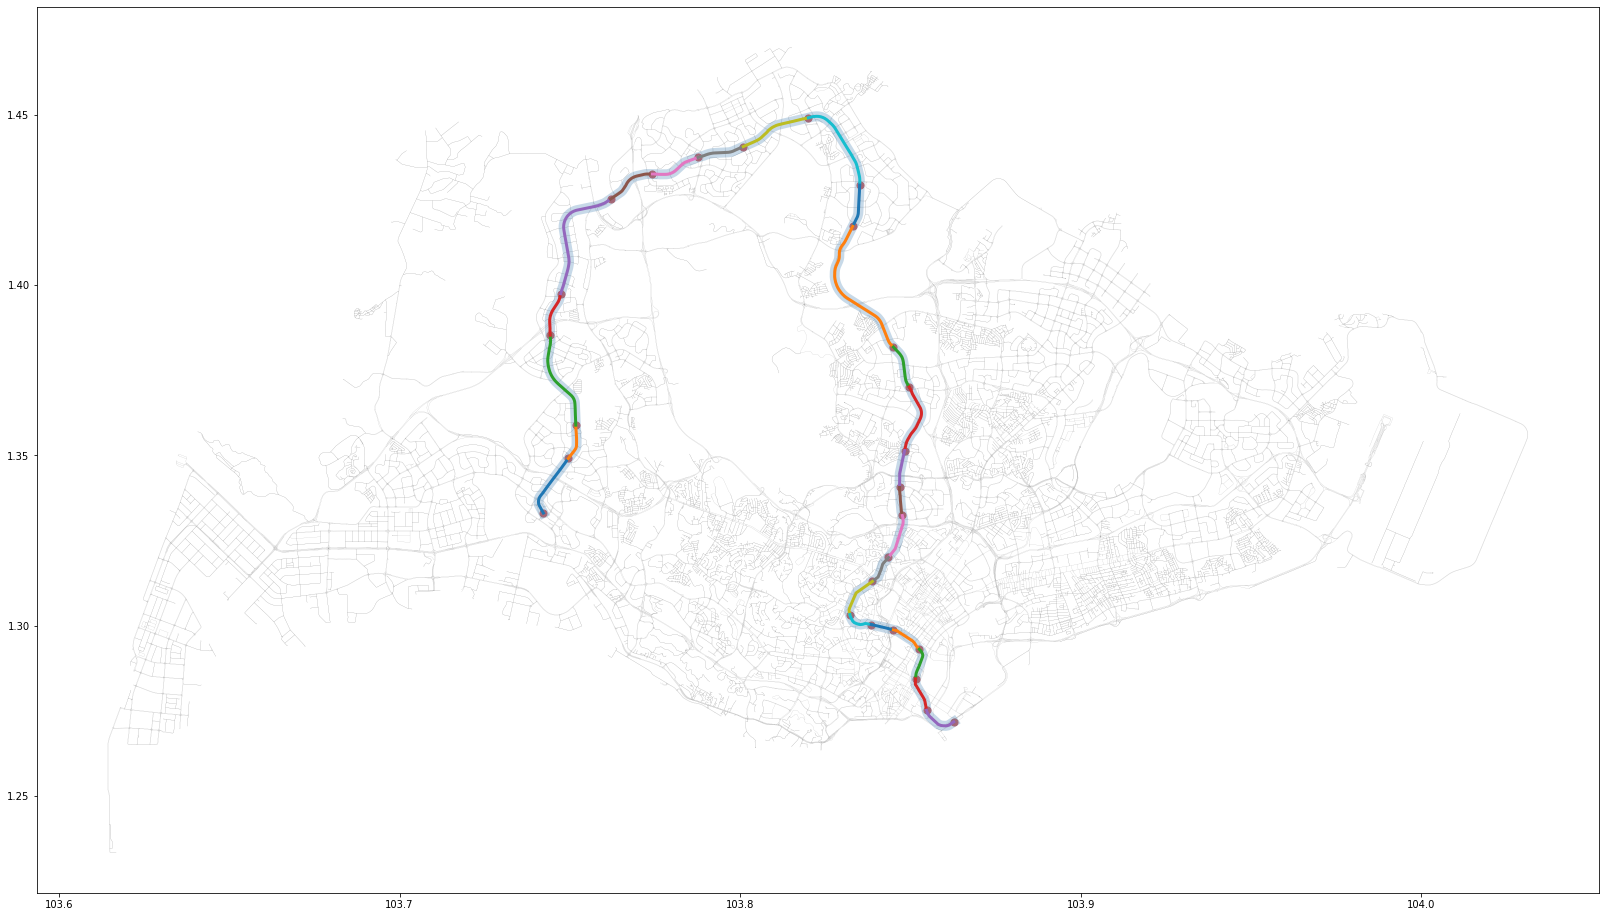

In [6]:
srr.plot_segmentation(path, sttn, lines, roadnet, out_path=None)

# 4. Construct Rail Graph
- You may then use networkx to construct your length-weighted graph of the rail network and do path query with it.